In [ ]:
!pip install pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=ee65f44a111d60733b07bd781cddc16885ead9a1a680a164e1fd0e5904eb8cd2
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [ ]:
import pyforest

In [ ]:
df= pd.read_csv("covid_19_clean_complete.csv")

In [ ]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0.0,0.0,0.0,0.0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0.0,0.0,0.0,0.0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0.0,0.0,0.0,0.0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0.0,0.0,0.0,0.0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0.0,0.0,0.0,0.0,Africa
...,...,...,...,...,...,...,...,...,...,...
49064,NaN,France,46.227600,2.213700,2020-05-21,179306.0,28167.0,62216.0,88923.0,Europe
49065,NaN,Gabon,-0.803700,11.609400,2020-05-21,1567.0,12.0,365.0,1190.0,Africa
49066,NaN,Gambia,13.443200,-15.310100,2020-05-21,24.0,1.0,13.0,10.0,Africa
49067,NaN,Georgia,42.315400,43.356900,2020-05-21,721.0,12.0,485.0,224.0,Europe


In [ ]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   1
Long                  1
Date                  1
Confirmed             1
Deaths                1
Recovered             1
Active                1
WHO Region            2
dtype: int64

In [ ]:
df.isnull().mean()

Province/State    0.701135
Country/Region    0.000000
Lat               0.000020
Long              0.000020
Date              0.000020
Confirmed         0.000020
Deaths            0.000020
Recovered         0.000020
Active            0.000020
WHO Region        0.000041
dtype: float64

In [ ]:
df.columns=['state','country','latitude','longitude','date','confirmed','deaths','recovered','active','Who']
df.head(5)

,state,country,latitude,longitude,date,confirmed,deaths,recovered,active,Who
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0.0,0.0,0.0,0.0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0.0,0.0,0.0,0.0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0.0,0.0,0.0,0.0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0.0,0.0,0.0,0.0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0.0,0.0,0.0,0.0,Africa


In [ ]:
df.dtypes

state         object
country       object
latitude     float64
longitude    float64
date          object
confirmed    float64
deaths       float64
recovered    float64
active       float64
Who           object
dtype: object

In [ ]:
df.dropna(subset=['date'], inplace=True)

In [ ]:
max_date = df['date'].max()
max_date

'2020-07-27'

In [ ]:
 df['date'].min()

'2020-01-22'

In [ ]:
top=df[df['date']==df['date'].max()]
top.head()

,state,country,latitude,longitude,date,confirmed,deaths,recovered,active,Who
33635,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263.0,1269.0,25198.0,9796.0,Eastern Mediterranean
33636,NaN,Albania,41.15330,20.168300,2020-07-27,4880.0,144.0,2745.0,1991.0,Europe
33637,NaN,Algeria,28.03390,1.659600,2020-07-27,27973.0,1163.0,18837.0,7973.0,Africa
33638,NaN,Andorra,42.50630,1.521800,2020-07-27,907.0,52.0,803.0,52.0,Europe
33639,NaN,Angola,-11.20270,17.873900,2020-07-27,950.0,41.0,242.0,667.0,Africa


In [ ]:
#
world = top.groupby("country")["confirmed", "active", "recovered", "deaths"].sum().reset_index()
world

<ipython-input-23-267429d60361>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world = top.groupby("country")["confirmed", "active", "recovered", "deaths"].sum().reset_index()


,country,confirmed,active,recovered,deaths
0,Afghanistan,36263.0,9796.0,25198.0,1269.0
1,Albania,4880.0,1991.0,2745.0,144.0
2,Algeria,27973.0,7973.0,18837.0,1163.0
3,Andorra,907.0,52.0,803.0,52.0
4,Angola,950.0,667.0,242.0,41.0
...,...,...,...,...,...
182,West Bank and Gaza,10621.0,6791.0,3752.0,78.0
183,Western Sahara,10.0,1.0,8.0,1.0
184,Yemen,1691.0,375.0,833.0,483.0
185,Zambia,4552.0,1597.0,2815.0,140.0


In [ ]:
import plotly
import plotly.express as px

figure = px.choropleth(world, locations = "country",
                       locationmode = "country names", color = "active",
                       hover_name = "country", range_color = [1,900000],
                       color_continuous_scale= "reds",
                       title = "Countried with active cases")
figure.show()

In [ ]:
# Total confirmed cases in all countries together datewise

total_cases = df.groupby("date")["confirmed", "active", "recovered", "deaths"].sum().reset_index()
total_cases

<ipython-input-27-a70ee5d79532>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,confirmed,active,recovered,deaths
0,2020-01-22,555.0,510.0,28.0,17.0
1,2020-01-23,654.0,606.0,30.0,18.0
2,2020-01-24,941.0,879.0,36.0,26.0
3,2020-01-25,1434.0,1353.0,39.0,42.0
4,2020-01-26,2118.0,2010.0,52.0,56.0
...,...,...,...,...,...
183,2020-07-23,15510481.0,6166006.0,8710969.0,633506.0
184,2020-07-24,15791645.0,6212290.0,8939705.0,639650.0
185,2020-07-25,16047190.0,6243930.0,9158743.0,644517.0
186,2020-07-26,16251796.0,6309711.0,9293464.0,648621.0


In [ ]:
total_cases["date"] = pd.to_datetime(total_cases["date"])

<IPython.core.display.Javascript object>

In [ ]:
total_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       188 non-null    datetime64[ns]
 1   confirmed  188 non-null    float64       
 2   active     188 non-null    float64       
 3   recovered  188 non-null    float64       
 4   deaths     188 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.5 KB


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Total confirmed cases')

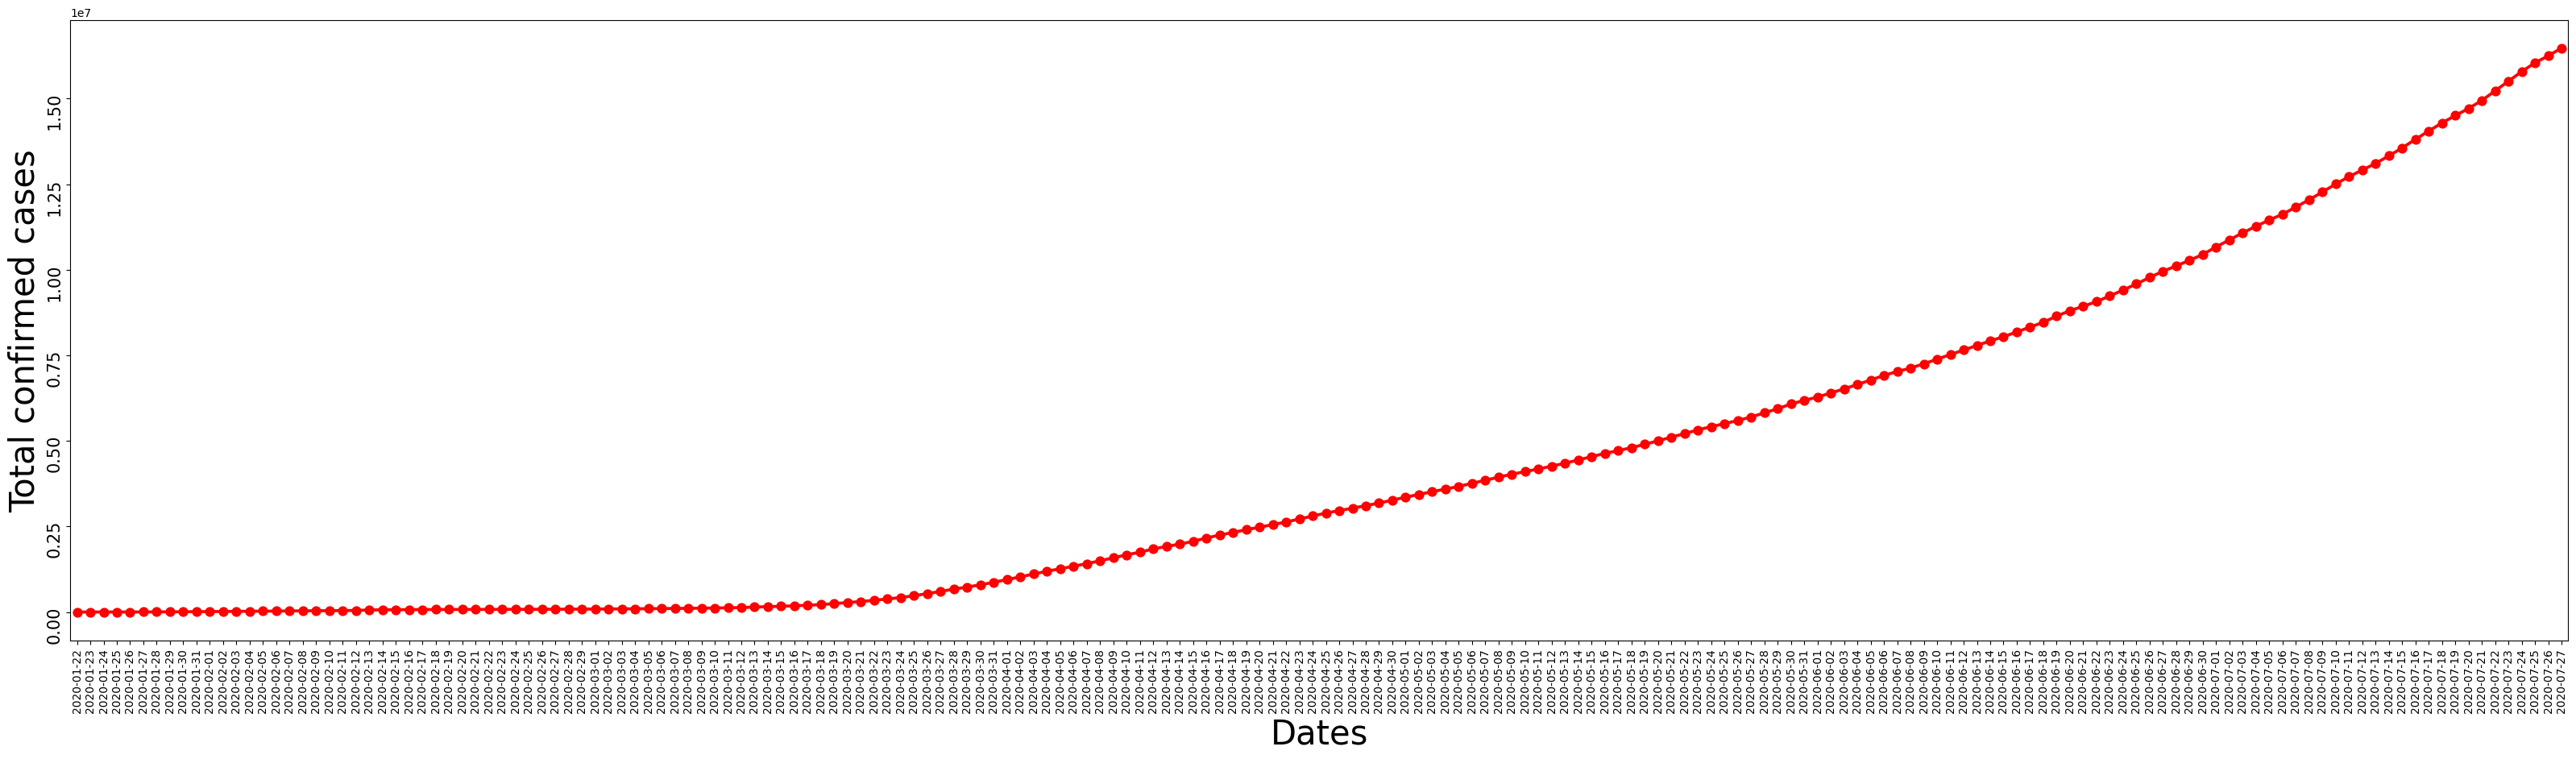

In [ ]:
# find the trend of total cases


plt.figure(figsize = (40,10))
ax = sns.pointplot(x = total_cases.date.dt.date, y = total_cases.confirmed, color = "r")
ax.set(xlabel = "Dates", ylabel = "Total cases")

plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(rotation = 90, fontsize = 15)

plt.xlabel("Dates", fontsize = 30)
plt.ylabel("Total confirmed cases", fontsize = 30)

In [ ]:
# Filter for the latest date
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]

# Select relevant columns for display
columns_to_display = ['country', 'active', 'confirmed', 'recovered', 'deaths']

# Display top 10 countries by total cases in tabular format
top_countries = latest_data.sort_values(by='confirmed', ascending=False).head(20).reset_index()
top_countries_table = top_countries[columns_to_display]
top_countries_table

,country,active,confirmed,recovered,deaths
0,US,2816444.0,4290259.0,1325804.0,148011.0
1,Brazil,508116.0,2442375.0,1846641.0,87618.0
2,India,495499.0,1480073.0,951166.0,33408.0
3,Russia,201097.0,816680.0,602249.0,13334.0
4,South Africa,170537.0,452529.0,274925.0,7067.0
5,Mexico,47657.0,395489.0,303810.0,44022.0
6,Peru,98752.0,389717.0,272547.0,18418.0
7,Chile,18782.0,347923.0,319954.0,9187.0
8,United Kingdom,254352.0,300111.0,0.0,45759.0
9,Iran,22550.0,293606.0,255144.0,15912.0


#active case


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-46-7c780111754d>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Top 20 countries')

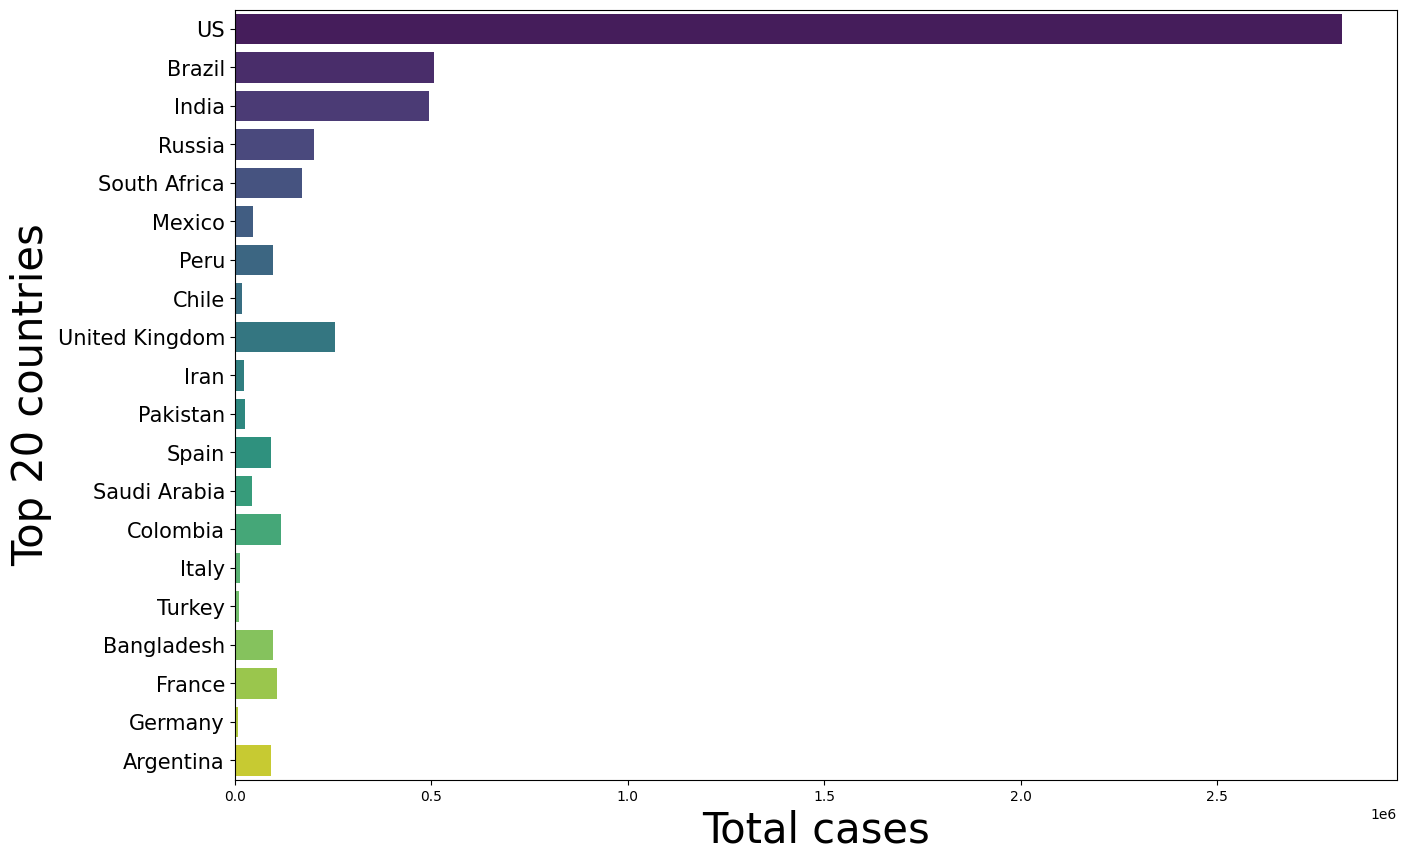

In [ ]:
plt.figure(figsize = (15,10))

ax = sns.barplot(x = top_countries_table.active, y = top_countries_table.country, palette='viridis')
ax.set(xlabel = "Total cases", ylabel = "Country")

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)

plt.xlabel("Total cases", fontsize = 30)
plt.ylabel("Top 20 countries", fontsize = 30)

#confirmed

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Top 20 countries')

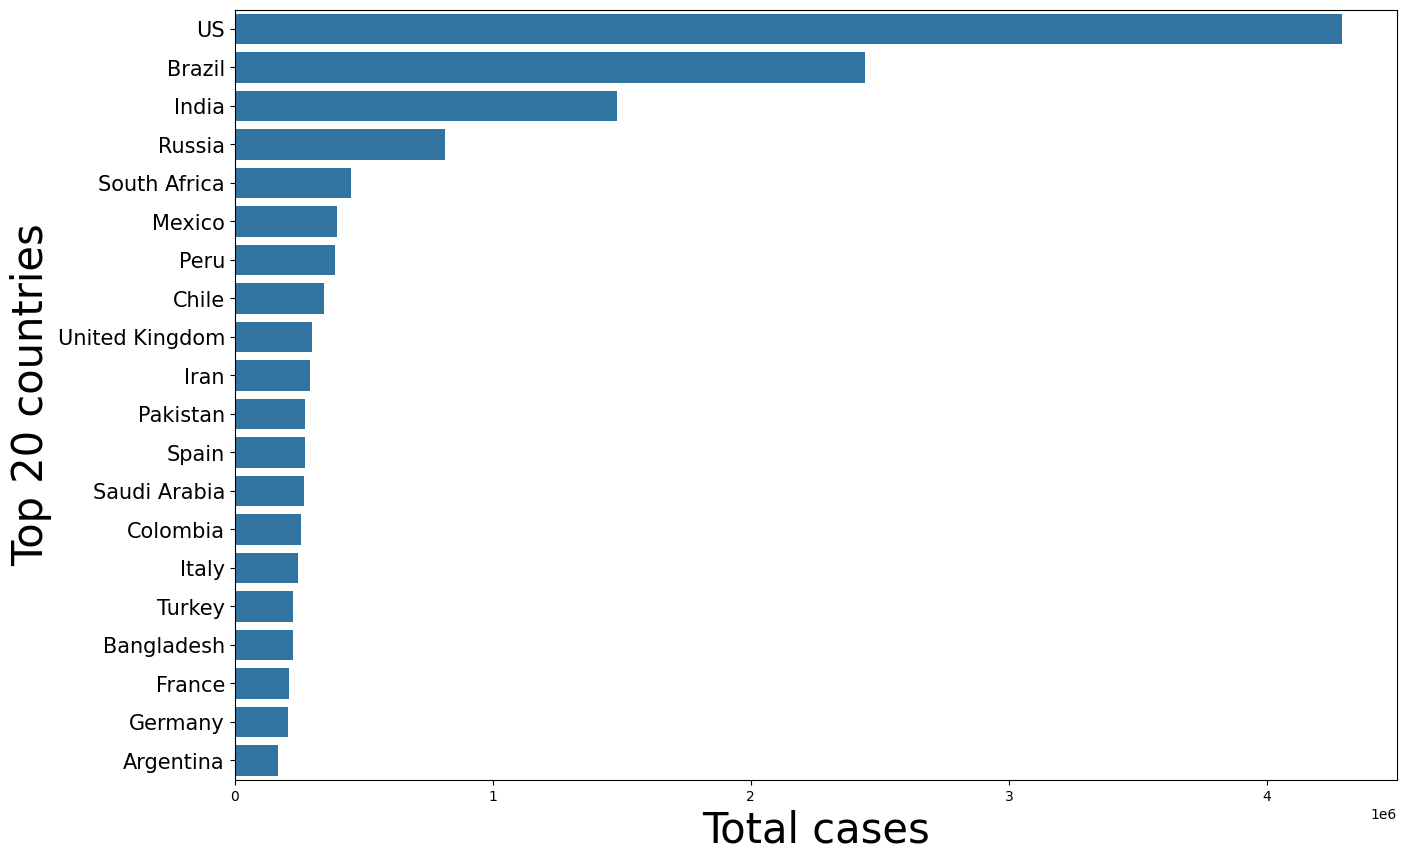

In [ ]:
plt.figure(figsize = (15,10))

ax = sns.barplot(x = top_countries_table.confirmed, y = top_countries_table.country)
ax.set(xlabel = "Total confirmed cases", ylabel = "Country")

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)

plt.xlabel("Total cases", fontsize = 30)
plt.ylabel("Top 20 countries", fontsize = 30)

#Recovered

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Top 20 countries')

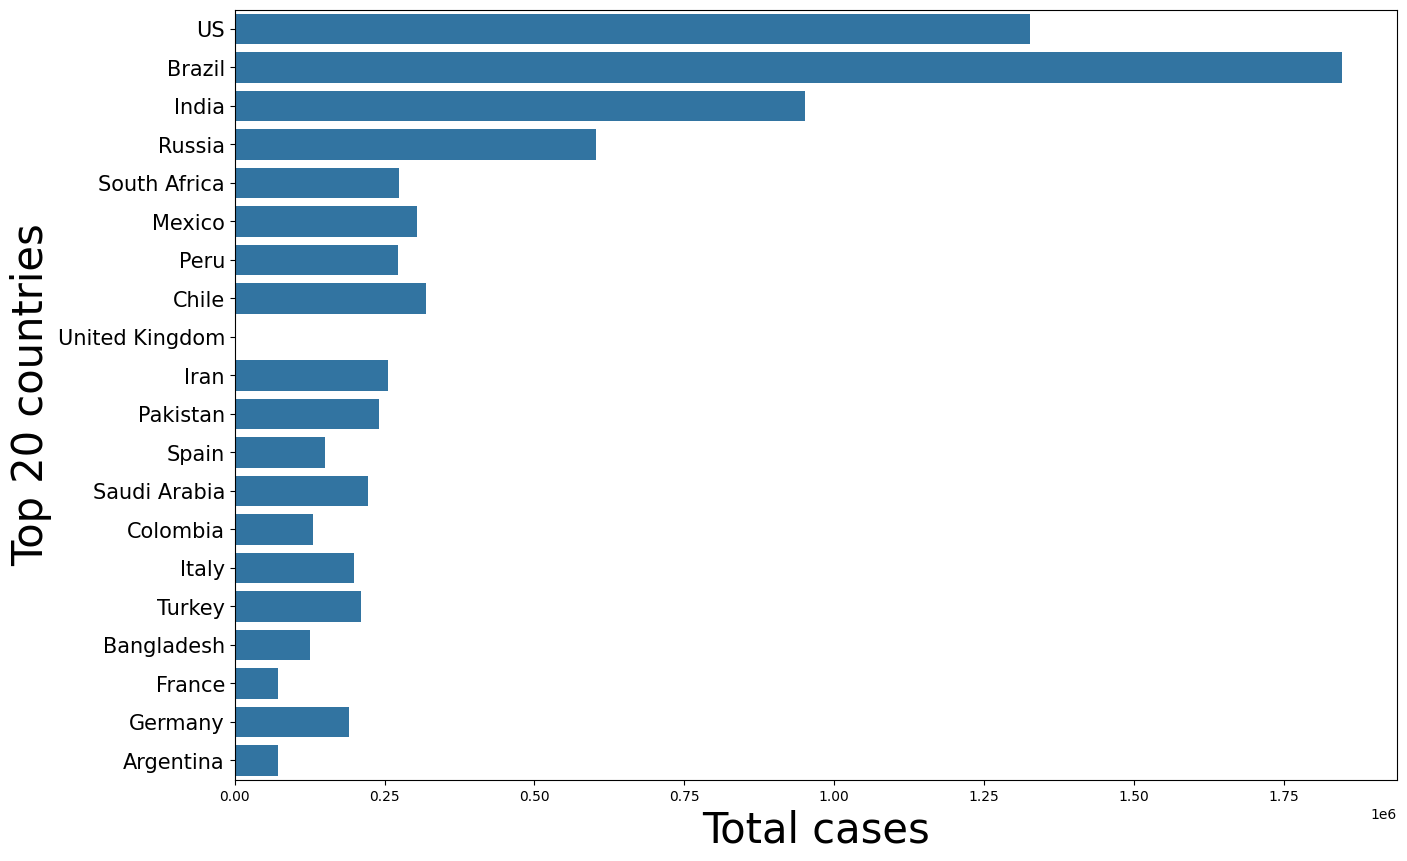

In [ ]:
plt.figure(figsize = (15,10))

ax = sns.barplot(x = top_countries_table.recovered, y = top_countries_table.country)
ax.set(xlabel = "Total cases", ylabel = "Country")

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 15)

plt.xlabel("Total cases", fontsize = 30)
plt.ylabel("Top 20 countries", fontsize = 30)

#Death

<IPython.core.display.Javascript object>

<ipython-input-66-979716c7d801>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Top 20 countries')

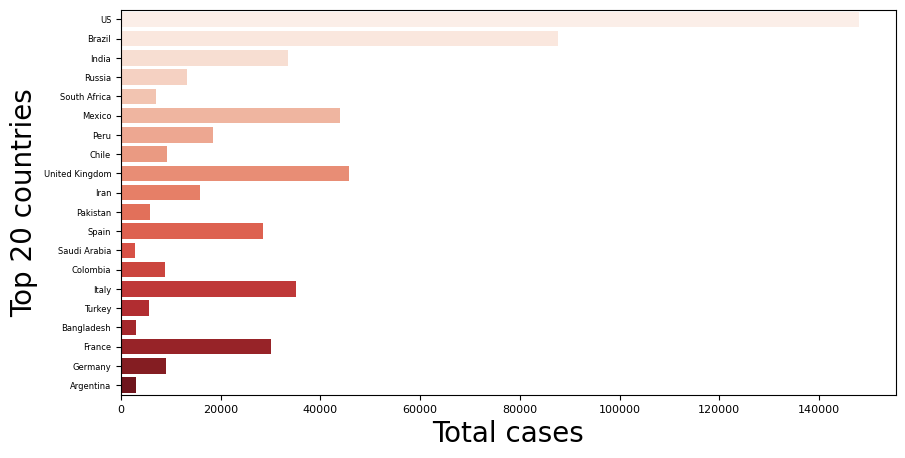

In [ ]:
plt.figure(figsize = (10,5))


ax = sns.barplot(x = top_countries_table.deaths, y = top_countries_table.country, palette='Reds')
ax.set(xlabel = "Total cases", ylabel = "Country")

plt.xticks(fontsize = 8)
plt.yticks(fontsize = 6)

plt.xlabel("Total cases", fontsize = 20)
plt.ylabel("Top 20 countries", fontsize = 20)

In [ ]:
# US data

us = df[df["country"] == "US"]
us = us.groupby("date")["active", "recovered", "deaths", "confirmed"].sum().reset_index()
us

<ipython-input-69-d691832bcef7>:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,active,recovered,deaths,confirmed
0,2020-01-22,1.0,0.0,0.0,1.0
1,2020-01-23,1.0,0.0,0.0,1.0
2,2020-01-24,2.0,0.0,0.0,2.0
3,2020-01-25,2.0,0.0,0.0,2.0
4,2020-01-26,5.0,0.0,0.0,5.0
...,...,...,...,...,...
183,2020-07-23,2661117.0,1233269.0,144430.0,4038816.0
184,2020-07-24,2705347.0,1261624.0,145560.0,4112531.0
185,2020-07-25,2753091.0,1279414.0,146465.0,4178970.0
186,2020-07-26,2789125.0,1297863.0,146935.0,4233923.0


In [ ]:
# Brazil data

brazil = df[df["country"] == "Brazil"]
brazil = brazil.groupby("date")["active", "recovered", "deaths", "confirmed"].sum().reset_index()
brazil

<ipython-input-70-d5163d797ed8>:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,active,recovered,deaths,confirmed
0,2020-01-22,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...
183,2020-07-23,583080.0,1620313.0,84082.0,2287475.0
184,2020-07-24,564914.0,1693214.0,85238.0,2343366.0
185,2020-07-25,522705.0,1785359.0,86449.0,2394513.0
186,2020-07-26,519174.0,1812913.0,87004.0,2419091.0


In [ ]:
# India data

india = df[df["country"] == "India"]
india = india.groupby("date")["active", "recovered", "deaths", "confirmed"].sum().reset_index()
india

<ipython-input-71-4eee344429a6>:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,active,recovered,deaths,confirmed
0,2020-01-22,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...
183,2020-07-23,440298.0,817209.0,30601.0,1288108.0
184,2020-07-24,456234.0,849432.0,31358.0,1337024.0
185,2020-07-25,468002.0,885573.0,32060.0,1385635.0
186,2020-07-26,485277.0,917568.0,32771.0,1435616.0


In [ ]:
df["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [ ]:
# China data

china = df[df["country"] == "China"]
china = china.groupby("date")["active", "recovered", "deaths", "confirmed"].sum().reset_index()
china

<ipython-input-73-27a8c3397c11>:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,active,recovered,deaths,confirmed
0,2020-01-22,503.0,28.0,17.0,548.0
1,2020-01-23,595.0,30.0,18.0,643.0
2,2020-01-24,858.0,36.0,26.0,920.0
3,2020-01-25,1325.0,39.0,42.0,1406.0
4,2020-01-26,1970.0,49.0,56.0,2075.0
...,...,...,...,...,...
183,2020-07-23,2695.0,78701.0,4649.0,86045.0
184,2020-07-24,2807.0,78745.0,4650.0,86202.0
185,2020-07-25,2916.0,78813.0,4652.0,86381.0
186,2020-07-26,3056.0,78862.0,4652.0,86570.0


Text(0, 0.5, 'Confirmed cases')

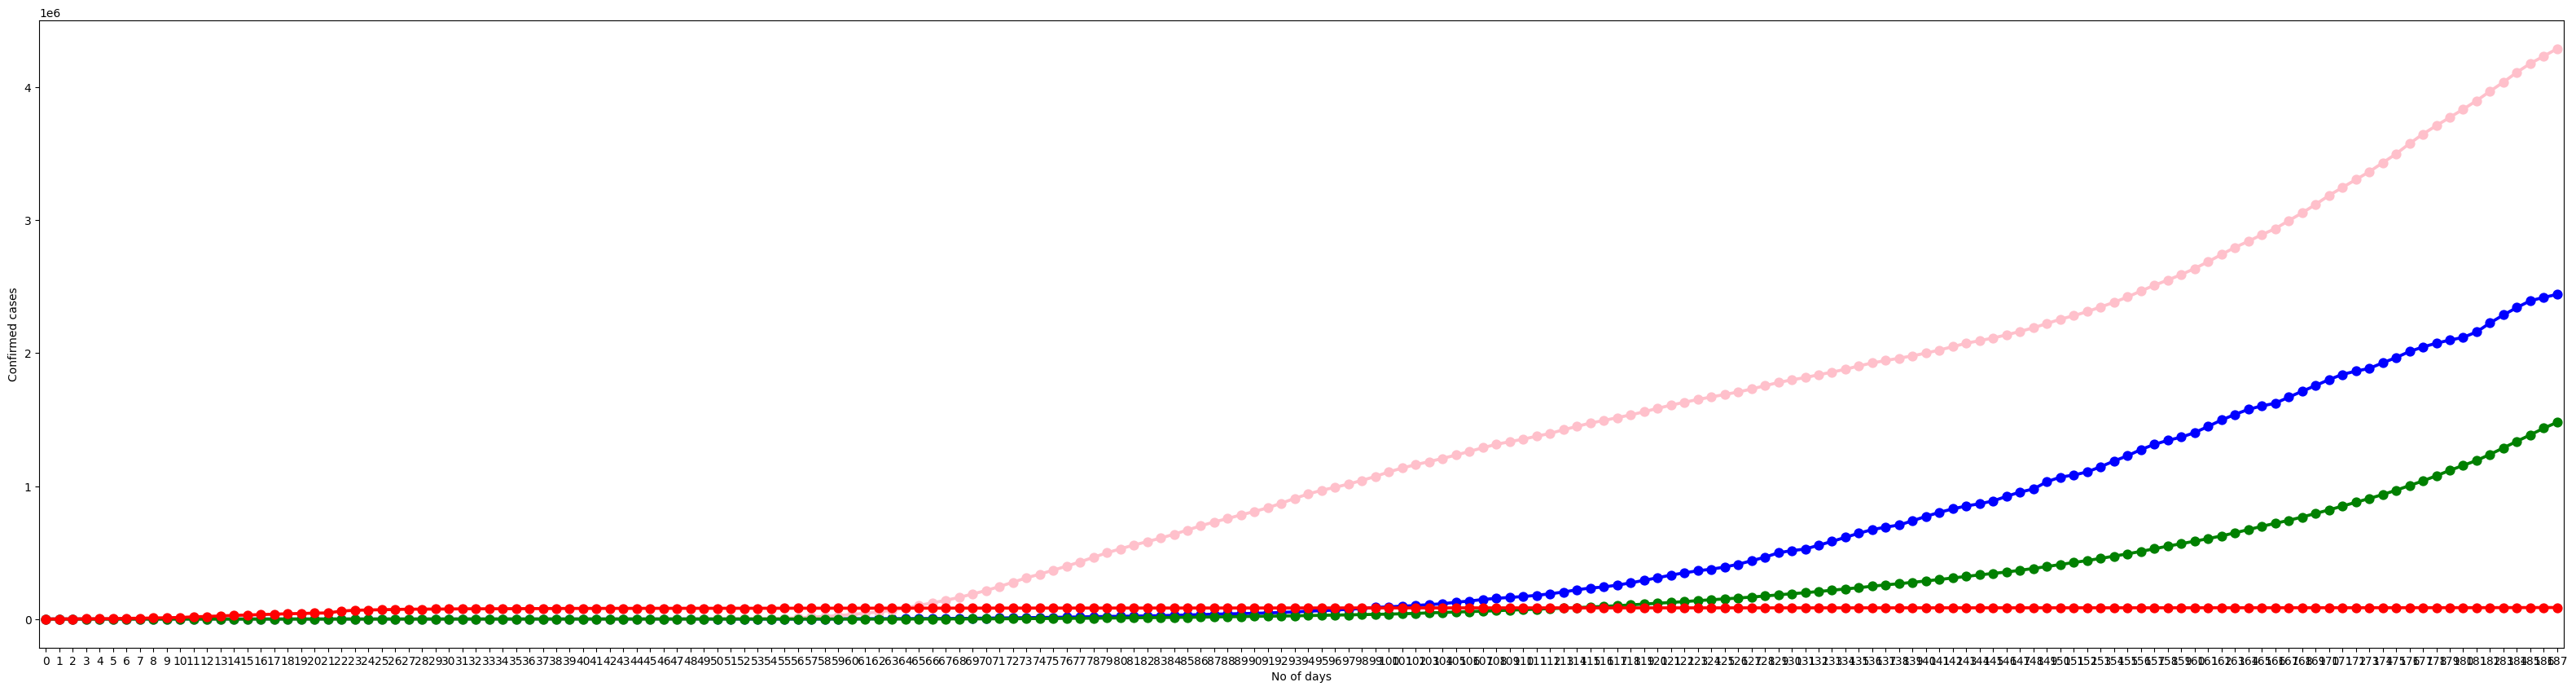

In [ ]:
plt.figure(figsize = (40,10))
sns.pointplot( x = brazil.index , y = brazil.confirmed , color = "Blue")
sns.pointplot( x = us.index , y = us.confirmed , color = "Pink")
sns.pointplot( x = india.index , y = india.confirmed , color = "Green")
sns.pointplot( x = china.index , y = china.confirmed , color = "Red")

plt.xlabel("No of days")
plt.ylabel("Confirmed cases")

#Trend Analysis for Active, confirmed death, recovered